# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face detection
Task is to predict the boundaries(mask) around the face in a given image.

## Dataset
Faces in images marked with bounding boxes. Have around 500 images with around 1100 faces manually tagged via bounding box.

### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Change current working directory to project folder (1 mark)

In [0]:
import os
os.chdir('/content/drive/My Drive/Resid9_AdvanceNetwork_Sequence/Project/')
#### Add your code here ####

### Load the "images.npy" file (2 marks)
- This file contains images with details of bounding boxes

In [0]:
# To upload file from My Computer
# from google.colab import files 
# uploaded = files.upload() 

In [0]:
import numpy as np
data = np.load('images (1).npy', allow_pickle = True)
#### Add your code here ####

In [8]:
data[5][0].shape

(500, 500, 3)

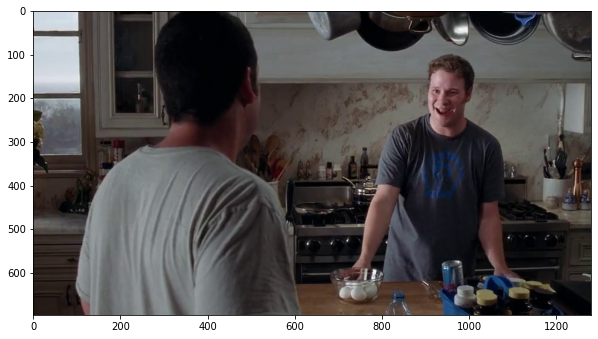

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(data[1][0])


In [10]:
data[1][1]

[{'imageHeight': 697,
  'imageWidth': 1280,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.7053087757313109, 'y': 0.23260437375745527},
   {'x': 0.7692307692307693, 'y': 0.36182902584493043}]}]

### Check one sample from the loaded "images.npy" file  (2 marks)

In [0]:
#### Add your code here ####

Set image dimensions   (1 mark)
- Initialize image height, image width with value: 224 

In [0]:
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224

#IMAGE_WIDTH = #### Add your code here ####
#IMAGE_HEIGHT = #### Add your code here ####

In [13]:
data[2][1]

[{'imageHeight': 240,
  'imageWidth': 460,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.46956521739130436, 'y': 0.05},
   {'x': 0.6065217391304348, 'y': 0.3333333333333333}]},
 {'imageHeight': 240,
  'imageWidth': 460,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.6282608695652174, 'y': 0.008333333333333333},
   {'x': 0.7456521739130435, 'y': 0.30833333333333335}]}]

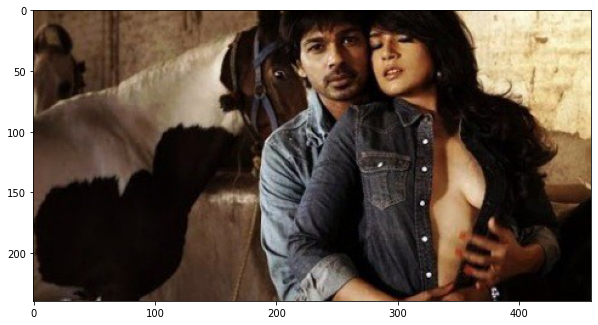

In [14]:
plt.figure(figsize=(10,10))
plt.imshow(data[2][0])

### Create features and labels
- Here feature is the image
- The label is the mask
- Images will be stored in "X_train" array
- Masks will be stored in "masks" array

In [0]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X_train = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X_train[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        # print(index, x1,x2,y1,y2)
        masks[index][y1:y2, x1:x2] = 1

In [16]:
# for i in data[0][1]:
#   print(i['points'])
masks.shape

(409, 224, 224)

### Print the shape of X_train and mask array  (1 mark)

In [17]:
X_train.shape

(409, 224, 224, 3)

In [18]:
masks.shape

(409, 224, 224)

In [0]:
#### Add your code here ####

In [0]:
#### Add your code here ####

### Print a sample image and image array

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[ 0.1686275   0.1686275   0.09019613]
  [ 0.22352946  0.22352946  0.14509809]
  [ 0.25490201  0.25490201  0.17647064]
  ...
  [ 0.14509809  0.12156868  0.06666672]
  [ 0.14509809  0.12156868  0.06666672]
  [ 0.14509809  0.12156868  0.06666672]]

 [[ 0.18431377  0.18431377  0.10588241]
  [ 0.22352946  0.22352946  0.14509809]
  [ 0.27058828  0.27058828  0.19215691]
  ...
  [ 0.14509809  0.12156868  0.06666672]
  [ 0.14509809  0.12156868  0.06666672]
  [ 0.15294123  0.12941182  0.07450986]]

 [[ 0.17647064  0.17647064  0.10588241]
  [ 0.21568632  0.21568632  0.14509809]
  [ 0.27058828  0.27058828  0.20000005]
  ...
  [ 0.15294123  0.12941182  0.07450986]
  [ 0.15294123  0.12941182  0.07450986]
  [ 0.14509809  0.12156868  0.06666672]]

 ...

 [[-0.00392157  0.00392163 -0.04313725]
  [-0.00392157  0.01176476 -0.04313725]
  [ 0.04313731  0.05098045  0.00392163]
  ...
  [-0.38039213 -0.38039213 -0.40392154]
  [-0.43529409 -0.4588235  -0.52941179]
  [-0.45098037 -0.49019605 -0.53725493]]

 [

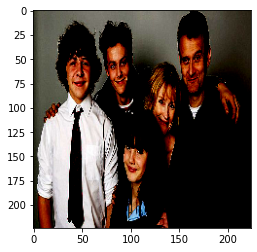

In [21]:
from matplotlib import pyplot
n = 6
print(X_train[n])
pyplot.imshow(X_train[n])
pyplot.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


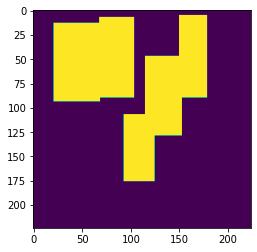

In [22]:
pyplot.imshow(masks[n])

## Create the model (10 marks)
- Add MobileNet as model with below parameter values
  - input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
  - include_top: False
  - alpha: 1.0
  - weights: "imagenet"
- Add UNET architecture layers
  - This is the trickiest part of the project, you need to research and implement it correctly

In [0]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape
from tensorflow.keras.models import Model


def create_model(trainable=False):
    model = MobileNet(include_top=False, #Should we include classification Layers
                                                      weights='imagenet', #Load imagenet weights, 'None' will load random weights
                                                      alpha =1,                                                    
                                                      input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3)) #Input image size

    # Layers till 79 are non trainable and from 80 will be trainable.
    for layer in model.layers[:75]:
        layer.trainable = trainable
        

    # Add all the UNET layers here
    #### Add your code here ####

   

#     **********************************To be checked later

    block0 = model.get_layer(model.layers[0].name).output 
    block1 = model.get_layer("conv_pw_1_relu").output
    block2 = model.get_layer("conv_pw_3_relu").output
    block3 = model.get_layer("conv_pw_5_relu").output
    block4 = model.get_layer("conv_pw_11_relu").output
    block5 = model.get_layer("conv_pw_13_relu").output

    x = Concatenate()([UpSampling2D()(block5), block4])
    x = Concatenate()([UpSampling2D()(x), block3])
    x = Concatenate()([UpSampling2D()(x), block2])
    x = Concatenate()([UpSampling2D()(x), block1])
    x = Concatenate()([UpSampling2D()(x), block0])
    #x = UpSampling2D()(x)
    x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)

    x = Reshape((IMAGE_HEIGHT, IMAGE_WIDTH))(x)

    return Model(inputs=model.input, outputs=x)

    #return model






### Call the create_model function

In [22]:
# Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)
model = create_model()

# Print summary
model.summary()

17227776/17225924 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
_____________________________

### Define dice coefficient function (5 marks)
- Create a function to calculate dice coefficient


In [0]:
import tensorflow as tf
def dice_coefficient(y_true, y_pred):

  numerator = 2 * tf.reduce_sum(y_true * y_pred)
  denominator = tf.reduce_sum(y_true + y_pred)

  #return 1 - (numerator + 1) / (denominator + 1)
  return numerator / (denominator + tf.keras.backend.epsilon())

    #### Add your code here ####
    #return #### Add your code here ####

### Define loss

In [0]:
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon())

### Compile the model (2 marks)
- Complie the model using below parameters
  - loss: use the loss function defined above
  - optimizers: use Adam optimizer
  - metrics: use dice_coefficient function defined above

In [0]:
#### Add your code here ####
model.compile(loss=loss,optimizer= 'adam' ,metrics=[dice_coefficient])


### Define checkpoint and earlystopping

In [26]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min", period=1)
stop = EarlyStopping(monitor="loss", patience=5, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="min")

### Fit the model (2 marks)
- Fit the model using below parameters
  - epochs: you can decide
  - batch_size: 1
  - callbacks: checkpoint, reduce_lr, stop

In [27]:
#### Add your code here ####
model.fit(x = X_train, y =masks, callbacks=[checkpoint, reduce_lr, stop], epochs = 10, batch_size= 1, verbose =1)

Epoch 1/10
409/409 [==============================] - ETA: 0s - loss: 1.2052 - dice_coefficient: 0.5140
Epoch 00001: loss improved from inf to 1.20521, saving model to model-1.21.h5
409/409 [==============================] - 13s 32ms/step - loss: 1.2052 - dice_coefficient: 0.5140 - lr: 0.0010
Epoch 2/10
408/409 [============================>.] - ETA: 0s - loss: 0.7703 - dice_coefficient: 0.6218
Epoch 00002: loss improved from 1.20521 to 0.77025, saving model to model-0.77.h5
409/409 [==============================] - 14s 33ms/step - loss: 0.7702 - dice_coefficient: 0.6216 - lr: 0.0010
Epoch 3/10
409/409 [==============================] - ETA: 0s - loss: 0.6781 - dice_coefficient: 0.6575
Epoch 00003: loss improved from 0.77025 to 0.67806, saving model to model-0.68.h5
409/409 [==============================] - 13s 33ms/step - loss: 0.6781 - dice_coefficient: 0.6575 - lr: 0.0010
Epoch 4/10
409/409 [==============================] - ETA: 0s - loss: 0.6110 - dice_coefficient: 0.6834
Epoch 

### Get the predicted mask for a sample image   (3 marks)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


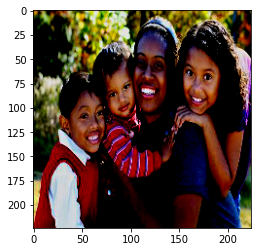

In [28]:
n = 72
sample_image = X_train[n]
pyplot.imshow(sample_image)

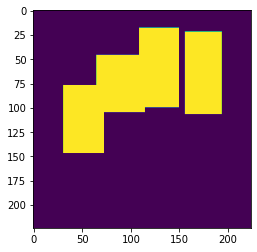

In [29]:
pyplot.imshow(masks[n])

In [30]:
masks[n].shape

(224, 224)

In [31]:
#### Add your code here ####
pred = model.predict(np.reshape(sample_image,(1,IMAGE_HEIGHT,IMAGE_WIDTH,3)))
pred.shape

(1, 224, 224)

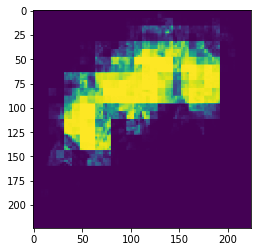

In [32]:

pyplot.imshow(np.reshape(pred,(IMAGE_HEIGHT,IMAGE_WIDTH)))

### Impose the mask on the image (3 marks)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


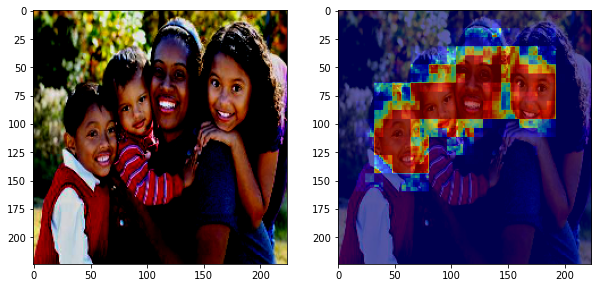

In [33]:
pyplot.figure(figsize=(10,10))
pyplot.subplot(1,2,1)
pyplot.imshow(sample_image)
pyplot.subplot(1,2,2)
pyplot.imshow(sample_image)
pyplot.imshow(np.reshape(pred,(IMAGE_HEIGHT,IMAGE_WIDTH)), 'jet',alpha=0.6)
pyplot.show()

### Lets Check on some other image from internet

In [34]:
!wget -q -O family.jpeg https://images.sadhguru.org/sites/default/files/media_files/sadhguru-isha-wisdom-article-image-family-matters-family-of-four-on-sofa.jpg
family_img = tf.keras.preprocessing.image.load_img('family.jpeg')
family_array = tf.keras.preprocessing.image.img_to_array(family_img)
family_array.shape

(600, 1000, 3)

In [0]:
family_array = family_array.astype(int)

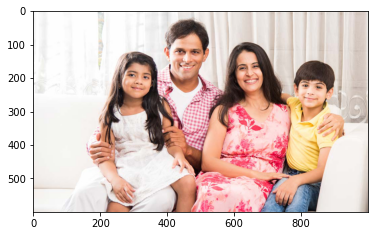

In [36]:
plt.imshow(family_array)
plt.show()

In [0]:
family_img = family_img.resize((224,224))

In [40]:
family_array = tf.keras.preprocessing.image.img_to_array(family_img)
family_array.shape

(224, 224, 3)

In [0]:
family_array = preprocess_input(np.array(family_array, dtype=np.float32))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


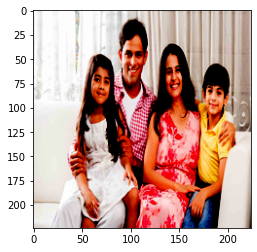

In [42]:
plt.imshow(family_array)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


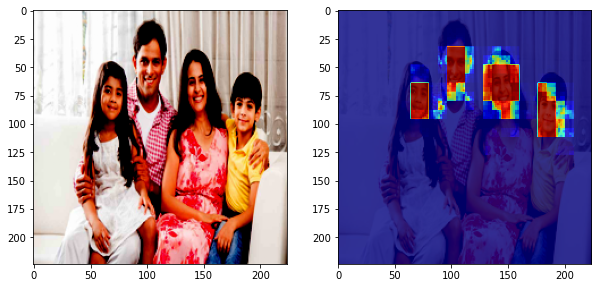

In [47]:
pyplot.figure(figsize=(10,10))
pyplot.subplot(1,2,1)
pyplot.imshow(family_array)
pyplot.subplot(1,2,2)
pyplot.imshow(family_array)
pred = model.predict(np.reshape(family_array,(1,IMAGE_HEIGHT,IMAGE_WIDTH,3)))
pyplot.imshow(np.reshape(pred,(IMAGE_HEIGHT,IMAGE_WIDTH)),'jet',alpha=0.8)
pyplot.show()